In [1]:
import diff_classifier.aws as aws
import diff_classifier.utils as ut
import diff_classifier.msd as msd
import diff_classifier.features as ft
import diff_classifier.imagej as ij
import os
import os.path as op
import numpy as np
import numpy.ma as ma
import pandas as pd
import boto3
import skimage.io as sio

# Loading and checking a video

In [2]:
test_image = sio.imread('P1_S1_R_0000_3_3.tif')

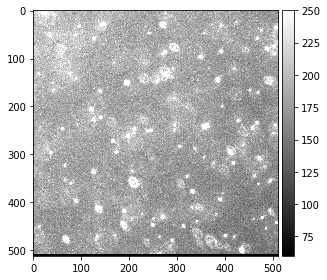

In [15]:
sio.imshow(test_image[650, :, :], cmap='gray', vmin=60, vmax=250)

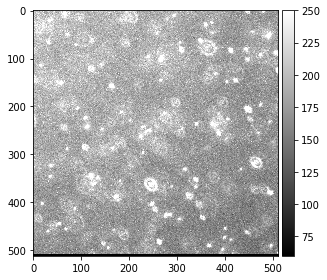

In [16]:
sio.imshow(test_image[0, :, :], cmap='gray', vmin=60, vmax=250)

# Splitting images before analysis

In [26]:
prefix = 'P1_S1_R_0000'
remote_folder = "01_18_Experiment/{}".format(prefix.split('_')[0])
local_folder = os.getcwd()
ires = 512
frames = 651
filename = '{}.tif'.format(prefix)
remote_name = op.join(remote_folder, filename)
local_name = op.join(local_folder, filename)

s3 = boto3.client('s3')

names = []
for i in range(0, 4):
    for j in range(0, 4):
        names.append('{}_{}_{}.tif'.format(prefix, i, j))

try:
    for name in names:
        aws.download_s3(op.join(remote_folder, name), name)
except:
    aws.download_s3(remote_name, local_name)
    names = ij.partition_im(local_name)
    for name in names:
        #aws.upload_s3(name, op.join(remote_folder, name))
        print("Done with splitting.  Should output file of name {}".format(op.join(remote_folder, name)))

In [27]:
ij.partition_im?